In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [2]:
dataset = pd.read_excel("AssessmentAnalytics_TestData.xlsx")

In [3]:
dataset.head(5)

,Sube,userid,Id,Bölüm,OnBilgi,QuizOrtalama,AraSinav,FinalSinav,OrtalamaCalismaSuresi,CanliDersToplamSure,Aktivite Tamamlama Oranı
0,EGK101-E,18269,1899,Özel Eğitim Öğretmenliği,20,44.775,85.0,70,0.485302,3.716667,29.577465
1,EGK101-E,11393,1900,Sınıf Öğretmenliği,20,36.775,58.1,65,0.386844,7.966667,26.760563
2,EGK101-E,14585,1901,Sosyal Bilgiler Öğretmenliği,28,37.825,63.8,45,0.352824,6.283333,22.535211
3,EGK101-E,9491,1902,Rehberlik ve Psikolojik Danışmanlık,72,75.825,85.0,75,0.455471,10.500000,43.661972
4,EGK101-E,17593,1903,Okul Öncesi Öğretmenliği,20,59.125,85.0,60,0.416549,4.650000,35.211268


In [4]:
bolumler = dataset['Bölüm'].unique()
print(bolumler)

['Özel Eğitim Öğretmenliği' 'Sınıf Öğretmenliği'
 'Sosyal Bilgiler Öğretmenliği' 'Rehberlik ve Psikolojik Danışmanlık'
 'Okul Öncesi Öğretmenliği']


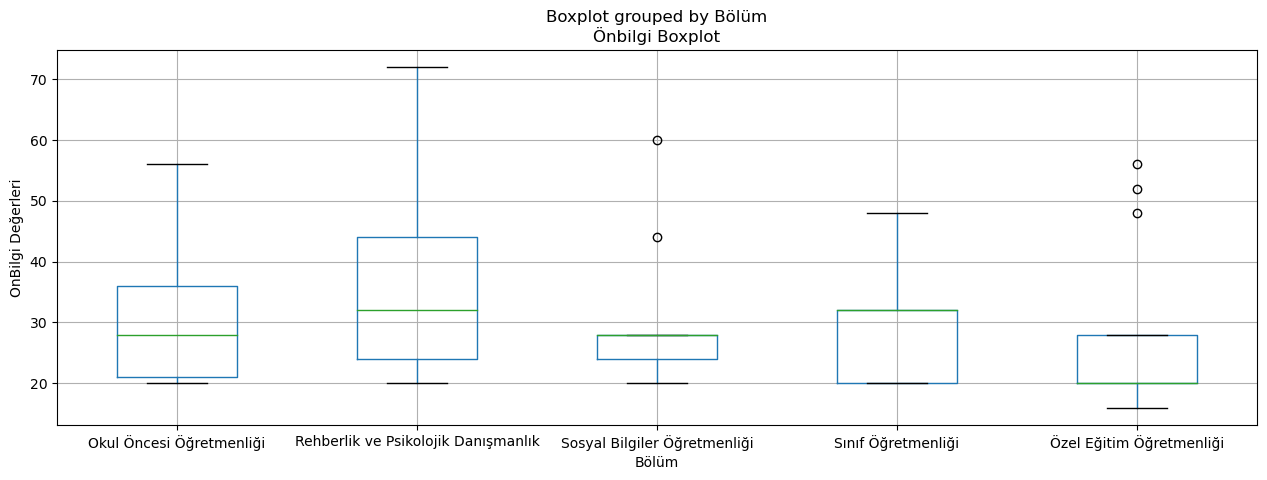

In [5]:
#Gruplara göre OnBilgi puanlarının boxplot gösterimi
dataset.boxplot(column='OnBilgi', by='Bölüm', figsize=(15, 5))
plt.title('Önbilgi Boxplot')
plt.ylabel('OnBilgi Değerleri')
plt.xlabel('Bölüm')
plt.show()

In [6]:
#Gruplara Göre OnBilgi puanlarını tasnif et
OE_Ogretmenlik = dataset[dataset['Bölüm'] == 'Özel Eğitim Öğretmenliği']['OnBilgi']
SN_Ogretmenlik = dataset[dataset['Bölüm'] == 'Sınıf Öğretmenliği']['OnBilgi']
SB_Ogretmenlik = dataset[dataset['Bölüm'] == 'Sosyal Bilgiler Öğretmenliği']['OnBilgi']
RPD_Ogretmenlik = dataset[dataset['Bölüm'] == 'Rehberlik ve Psikolojik Danışmanlık']['OnBilgi']
ON_Ogretmenlik = dataset[dataset['Bölüm'] == 'Okul Öncesi Öğretmenliği']['OnBilgi']

OE_Ogretmenlik.head(5)

0     20
17    16
24    20
25    20
29    52
Name: OnBilgi, dtype: int64

In [7]:
#Gruplara Göre OnBilgi puanlarının Shapira Wilks Normalite Testi ( > 0.05)
stat_OnBilgi_OE, p_value_OnBilgi_OE = stats.shapiro(OE_Ogretmenlik)
stat_OnBilgi_SN, p_value_OnBilgi_SN = stats.shapiro(SN_Ogretmenlik)
stat_OnBilgi_SB, p_value_OnBilgi_SB = stats.shapiro(SB_Ogretmenlik)
stat_OnBilgi_RPD, p_value_OnBilgi_RPD = stats.shapiro(RPD_Ogretmenlik)
stat_OnBilgi_ON, p_value_OnBilgi_ON = stats.shapiro(ON_Ogretmenlik)

print("OE_Ogretmenlik Önbilgi p-değeri:", p_value_OnBilgi_OE)
print("SN_Ogretmenlik Önbilgi p-değeri:", p_value_OnBilgi_SN)
print("SB_Ogretmenlik Önbilgi p-değeri:", p_value_OnBilgi_SB)
print("RPD_Ogretmenlik Önbilgi p-değeri:", p_value_OnBilgi_RPD)
print("ON_Ogretmenlik Önbilgi p-değeri:", p_value_OnBilgi_ON)

OE_Ogretmenlik Önbilgi p-değeri: 0.0007490250864066184
SN_Ogretmenlik Önbilgi p-değeri: 0.08493658900260925
SB_Ogretmenlik Önbilgi p-değeri: 0.0035364346113055944
RPD_Ogretmenlik Önbilgi p-değeri: 0.044092051684856415
ON_Ogretmenlik Önbilgi p-değeri: 0.04079432040452957


In [8]:
from scipy.stats import levene

# Gruplara Göre OnBilgi puanlarının Levene Testi - Homojenlik testi ( > 0.05)
stat_OnBilgi_OE, p_value_OnBilgi = levene(OE_Ogretmenlik, SN_Ogretmenlik, SB_Ogretmenlik, RPD_Ogretmenlik, ON_Ogretmenlik)
print("Önbilgi için p-değeri:", p_value_OnBilgi)

Önbilgi için p-değeri: 0.7217047961239136


In [9]:
from scipy.stats import kruskal

#Grupların Onbilgi Puanları normal dağılıma uygun değil(Sınıf Öğr. Hariç) ancak gruplar bazında varyanslar arasında homojenlik gösteriyor. 
#Önbilgi için Non-Parametrik test olan Kruskal-Wallis-H testi

stat, p_value = kruskal(OE_Ogretmenlik, SN_Ogretmenlik, SB_Ogretmenlik, RPD_Ogretmenlik,ON_Ogretmenlik )

# Sonuçları yazdırma
print("Kruskal-Wallis Test Sonuçları:")
print("P-değeri:", p_value)

# α = 0.05 anlamlılık düzeyini kullanabilirsiniz
if p_value < 0.05:  
    print("Sonuçlar istatistiksel olarak anlamlıdır. Gruplar arasında fark vardır.")
else:
    print("Sonuçlar istatistiksel olarak anlamlı değildir. Gruplar arasında fark yoktur.")




Kruskal-Wallis Test Sonuçları:
P-değeri: 0.5227707832735908
Sonuçlar istatistiksel olarak anlamlı değildir. Gruplar arasında fark yoktur.


In [10]:
from scipy.stats import f_oneway

# Önbilgi, Arasınav ve Final sınavı verilerini gruplara ayırın
gruplar_onbilgi = [dataset[dataset['Bölüm'] == bolum]['OnBilgi'] for bolum in dataset['Bölüm'].unique()]

# ANOVA testi
stat_onbilgi, p_value_onbilgi = f_oneway(*gruplar_onbilgi)

alpha = 0.05  # Anlamlılık düzeyi

if p_value_onbilgi < alpha:
    print("Önbilgi verileri için ANOVA testi sonucu: Gruplar arasında anlamlı bir fark var. (p-değeri:", p_value_onbilgi, ")")
else:
    print("Önbilgi verileri için ANOVA testi sonucu: Gruplar arasında anlamlı bir fark yok. (p-değeri:", p_value_onbilgi, ")")


Önbilgi verileri için ANOVA testi sonucu: Gruplar arasında anlamlı bir fark yok. (p-değeri: 0.6839487401340045 )
